# Predicting strength of steel based on steel chemistry - Data Wrangling

This project will create a model that predicts the physical strength of a steel based on its alloying elements and temperature

## 1.0 Loading data

In [1]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading both datasets
path = "/Users/chinmayasukumar/Documents/Springboard/Unit 7/Capstone #2/data/raw/MatNavi Mechanical properties of low-alloy steels.csv"
steel = pd.read_csv(path)

## 2.0 Exploring data

In [3]:
print('steel columns: ', steel.columns)

steel columns:  Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')


In [4]:
print('steel dtypes: ','\n',steel.dtypes)

steel dtypes:  
 Alloy code                   object
 C                          float64
 Si                         float64
 Mn                         float64
 P                          float64
 S                          float64
 Ni                         float64
 Cr                         float64
 Mo                         float64
 Cu                         float64
V                           float64
 Al                         float64
 N                          float64
Ceq                         float64
Nb + Ta                     float64
 Temperature (°C)             int64
 0.2% Proof Stress (MPa)      int64
 Tensile Strength (MPa)       int64
 Elongation (%)               int64
 Reduction in Area (%)        int64
dtype: object


In [5]:
print(steel.describe())

                C          Si          Mn           P           S          Ni  \
count  915.000000  915.000000  915.000000  915.000000  915.000000  915.000000   
mean     0.174929    0.310918    0.812962    0.014543    0.010602    0.143016   
std      0.059674    0.086871    0.342775    0.005244    0.004024    0.172746   
min      0.090000    0.180000    0.420000    0.006000    0.003000    0.000000   
25%      0.130000    0.240000    0.500000    0.010000    0.008000    0.023000   
50%      0.160000    0.300000    0.680000    0.014000    0.010000    0.050000   
75%      0.200000    0.370000    1.210000    0.018000    0.012000    0.210000   
max      0.340000    0.520000    1.480000    0.030000    0.022000    0.600000   

               Cr          Mo          Cu           V          Al           N  \
count  915.000000  915.000000  915.000000  915.000000  915.000000  915.000000   
mean     0.427861    0.442870    0.079148    0.060190    0.012435    0.007652   
std      0.457568    0.3943

For the physical properties, there are no 0 or negative values which is expected however, there are a few suspicious values for the strength in the upper range which will be looked into in the data cleaning section.

## 3.0 Data Manipulation

### 3.1 Dropping columns

Columns such as alloy code aren't useful in this case. Ceq isn't useful either as all other alloying elements are known.

In [6]:
steel = steel.drop(columns=['Alloy code', 'Ceq'])

### 3.2 Renaming columns

For simplicity sake,the columns will be renamed.

In [7]:
steel.columns = ['c', 'si', 'mn', 'p', 's', 'ni', 'cr', 'mo', 'cu', 'v', 'al', 'n', 'nb+ta', 'temp', 'yield', 'tensile', 'elongation', 'red_area' ]
steel.columns

Index(['c', 'si', 'mn', 'p', 's', 'ni', 'cr', 'mo', 'cu', 'v', 'al', 'n',
       'nb+ta', 'temp', 'yield', 'tensile', 'elongation', 'red_area'],
      dtype='object')

## 4.0 Data Cleaning

In [8]:
# Finding NA values
steel.isna().sum()

c             0
si            0
mn            0
p             0
s             0
ni            0
cr            0
mo            0
cu            0
v             0
al            0
n             0
nb+ta         0
temp          0
yield         0
tensile       0
elongation    0
red_area      0
dtype: int64

The data seems to be free of null values, however there is the issue of the unusally high tensile strength observation

In [9]:
print(steel[steel['tensile']==6661])

        c    si    mn      p      s   ni    cr    mo    cu    v    al       n  \
626  0.18  0.37  0.66  0.018  0.017  0.1  1.07  1.03  0.12  0.3  0.02  0.0081   

     nb+ta  temp  yield  tensile  elongation  red_area  
626    0.0   300    519     6661          11        28  


In [10]:
steel = steel.drop(index = steel[steel['tensile']==6661].index)

In [11]:
steel.sort_values(by='tensile', ascending=False).head()

,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb+ta,temp,yield,tensile,elongation,red_area
421,0.29,0.26,0.76,0.009,0.007,0.45,1.12,1.18,0.07,0.23,0.003,0.0103,0.0,27,685,830,17,62
391,0.29,0.20,0.75,0.010,0.009,0.34,1.00,1.25,0.14,0.26,0.002,0.0075,0.0,27,690,830,17,59
431,0.29,0.26,0.77,0.009,0.007,0.46,1.12,1.20,0.08,0.23,0.004,0.0095,0.0,27,660,820,17,59
381,0.28,0.18,0.75,0.012,0.009,0.32,1.00,1.25,0.14,0.27,0.002,0.0090,0.0,27,665,810,18,63
401,0.30,0.28,0.72,0.014,0.006,0.35,0.93,1.22,0.16,0.21,0.002,0.0093,0.0,27,645,810,19,60


In [12]:
steel.shape

(914, 18)

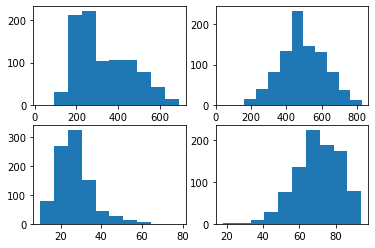

In [13]:
fig, ax = plt.subplots(2,2)

ax[0,0].hist(steel['yield'])
ax[0,1].hist(steel['tensile'])
ax[1,0].hist(steel['elongation'])
ax[1,1].hist(steel['red_area'])

ax[0,1].set_xticks(range(0, steel['tensile'].max(),200))

plt.show()